In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import os
import csv
import seaborn as sns
sns.set()

In [13]:
fileWaterTemp = "data/nwis.waterdata.usgs.gov.csv"

dataPath = pd.read_csv(fileWaterTemp)

temp_1_df = pd.DataFrame(dataPath[28:])

temp_1_df = temp_1_df.rename(columns={"# ---------------------------------- WARNING ----------------------------------------":"Outfit",
                                     "Unnamed: 1": "Station ID",
                                     "Unnamed: 2": "Date/Time",
                                     "Unnamed: 3": "Timezone",
                                     "Unnamed: 4": "Temperature C",
                                     "Unnamed: 5": "Approval Code"}) 




new = temp_1_df["Date/Time"].str.split(" ", n=1, expand = True)

temp_1_df["Date"]= new[0]
temp_1_df["Time"]= new[1]

temp_1_df.drop(columns = ["Date/Time"], inplace = True)

temp_1_df['Date'] = pd.to_datetime(temp_1_df['Date']).dt.strftime('%Y/%m/%d')

temp_1_df["Temperature C"] = temp_1_df["Temperature C"].astype(float)


In [19]:
eventDate = temp_1_df.groupby("Date")

avgTempColumbia = eventDate["Temperature C"].mean()


eventDate_df = pd.DataFrame({"Average Temperature": avgTempColumbia})


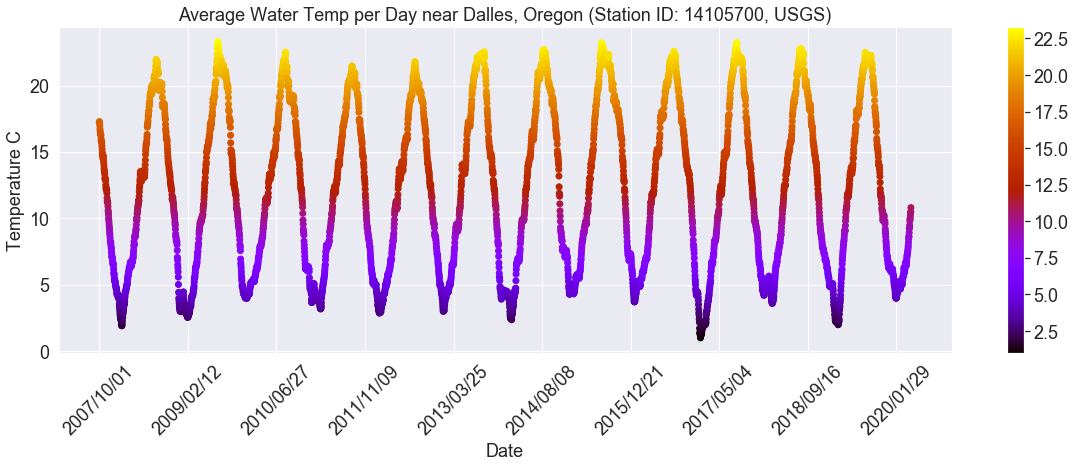

In [15]:
eventDate_df["Time"] = eventDate_df.index
x_axis = np.arange(len(eventDate_df['Time']))
tick_locations = [value for value in x_axis]
labels = eventDate_df.index

y = eventDate_df["Average Temperature"]

cm = mp.cm.get_cmap('gnuplot')
mp.rc('xtick', labelsize=18) 
mp.rc('ytick', labelsize=18)
plt.figure(figsize=(20,6))
sc = plt.scatter(x_axis,y, c=y, cmap=cm)
plt.xticks(tick_locations[::500], labels[::500], rotation=45)
plt.colorbar(sc)
plt.xlabel("Date", fontsize=18) 
plt.ylabel('Temperature C', fontsize=18)              
plt.title('Average Water Temp per Day near Dalles, Oregon (Station ID: 14105700, USGS)', fontsize=18)        
plt.savefig('images/tempDalles.png', bbox_inches="tight", pad_inches=0.2)            
plt.show()

<img src="images/tempDalles.png"/>